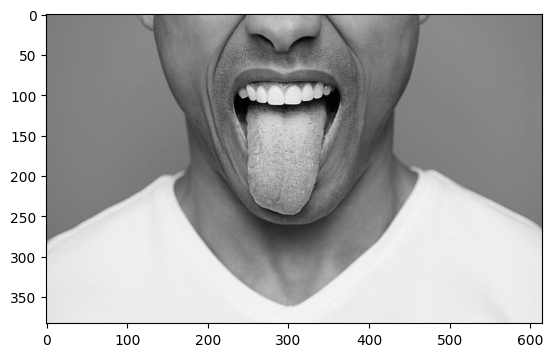

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR = "../Dataset"
CATEGORIES = ["non-cancer","cancer"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

## Generalizing Image Size

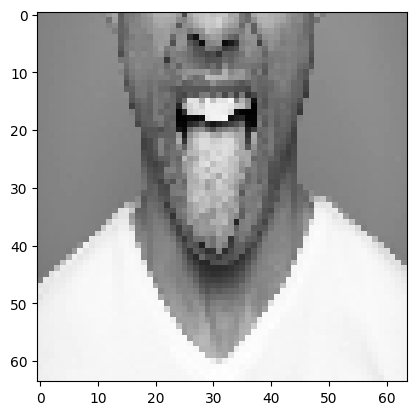

In [3]:
IMG_SIZE = 64
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

## Data Augumentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [11]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#### Generated 40 images under "non-cancer"

In [22]:
path_non_cancer = f"{DATADIR}/non-cancer"
images_list_non_cancer = os.listdir(path_non_cancer)
for i in range(40):
    img_filename = images_list_non_cancer[random.randint(0,len(images_list_non_cancer)-1)]
    img_path = os.path.join(path_non_cancer,img_filename)
    img = load_img(img_path)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    for batch in datagen.flow(
        x, 
        batch_size=1,
        save_to_dir=f"{DATADIR}/non-cancer", 
        save_prefix='non-cancer', 
        save_format='jpg'
    ):
        break

## Creating Training Data

In [25]:
training_data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_data()

In [26]:
import random
random.shuffle(training_data)

In [27]:
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [28]:
np.unique(y,return_counts=True)

(array([0, 1]), array([84, 87], dtype=int64))

## Saving the Data using Pickle

In [29]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()